<a href="https://colab.research.google.com/github/jkasprowicz/stresslevel/blob/main/handsonworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd

# Load and parse the XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Initialize lists to store heart rate and workout data
heart_rate_data = []
workout_data = []

# Loop through the XML records
for record in root.findall('Record'):
    record_type = record.get('type')
    timestamp = record.get('startDate')
    value = record.get('value')

    # Extract heart rate records
    if record_type == "HKQuantityTypeIdentifierHeartRate":
        heart_rate_data.append((timestamp, float(value)))

    # Extract workout records (to detect exercise periods)
    elif record_type == "HKWorkoutTypeIdentifier":
        workout_data.append((timestamp, record.get('workoutActivityType')))

# Convert data to pandas DataFrames
heart_rate_df = pd.DataFrame(heart_rate_data, columns=['timestamp', 'heart_rate'])
workout_df = pd.DataFrame(workout_data, columns=['timestamp', 'activity_type'])

print(heart_rate_df.head())
print(workout_df.head())

                   timestamp  heart_rate
0  2023-09-23 13:41:01 -0300        84.0
1  2023-09-23 13:49:04 -0300        79.0
2  2023-09-23 13:51:57 -0300        84.0
3  2023-09-23 13:56:12 -0300        80.0
4  2023-09-23 14:02:05 -0300        83.0
Empty DataFrame
Columns: [timestamp, activity_type]
Index: []


In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse the Apple Health XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Extract records of interest
data = []
for record in root.findall('Record'):
    record_type = record.get('type')
    value = record.get('value')
    start_date = record.get('startDate')
    end_date = record.get('endDate')
    source = record.get('sourceName')

    # Keep only relevant records
    if record_type in [
        "HKQuantityTypeIdentifierHeartRate",
        "HKQuantityTypeIdentifierHeartRateVariabilitySDNN",
        "HKQuantityTypeIdentifierRestingHeartRate",
        "HKWorkoutActivityType",
        "HKCategoryTypeIdentifierSleepAnalysis"
    ]:
        data.append([record_type, value, start_date, end_date, source])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['type', 'value', 'start_date', 'end_date', 'source'])

# Convert date columns to datetime and value to numeric
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

print(df.head())

                                type  value                start_date  \
0  HKQuantityTypeIdentifierHeartRate   84.0 2023-09-23 13:41:01-03:00   
1  HKQuantityTypeIdentifierHeartRate   79.0 2023-09-23 13:49:04-03:00   
2  HKQuantityTypeIdentifierHeartRate   84.0 2023-09-23 13:51:57-03:00   
3  HKQuantityTypeIdentifierHeartRate   80.0 2023-09-23 13:56:12-03:00   
4  HKQuantityTypeIdentifierHeartRate   83.0 2023-09-23 14:02:05-03:00   

                   end_date              source  
0 2023-09-23 13:41:01-03:00  João’s Apple Watch  
1 2023-09-23 13:49:04-03:00  João’s Apple Watch  
2 2023-09-23 13:51:57-03:00  João’s Apple Watch  
3 2023-09-23 13:56:12-03:00  João’s Apple Watch  
4 2023-09-23 14:02:05-03:00  João’s Apple Watch  


Number of rows: 94445
Number of columns: 5

Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94445 entries, 0 to 94444
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype                    
---  ------      --------------  -----                    
 0   type        94445 non-null  object                   
 1   value       91443 non-null  float64                  
 2   start_date  94445 non-null  datetime64[ns, UTC-03:00]
 3   end_date    94445 non-null  datetime64[ns, UTC-03:00]
 4   source      94445 non-null  object                   
dtypes: datetime64[ns, UTC-03:00](2), float64(1), object(2)
memory usage: 3.6+ MB
None

Summary Statistics for Numeric Columns:
              value
count  91443.000000
mean      90.427757
std       22.008831
min        8.465820
25%       73.000000
50%       87.000000
75%      104.000000
max      203.000000

Missing Values:
type             0
value         3002
start_date       0
end_date         0
source    

,type,value,start_date,end_date,source
92802,HKCategoryTypeIdentifierSleepAnalysis,NaN,2024-03-09 23:50:03-03:00,2024-03-09 23:52:16-03:00,João’s iPhone
41938,HKQuantityTypeIdentifierHeartRate,79.0,2017-11-29 21:11:34-03:00,2017-11-29 21:11:34-03:00,Apple Watch de josmar
26967,HKQuantityTypeIdentifierHeartRate,68.0,2018-01-03 18:44:17-03:00,2018-01-03 18:44:17-03:00,Apple Watch de josmar
74182,HKQuantityTypeIdentifierHeartRate,73.0,2024-01-23 14:45:42-03:00,2024-01-23 14:45:42-03:00,João’s Apple Watch
1107,HKQuantityTypeIdentifierHeartRate,75.0,2023-09-27 16:12:20-03:00,2023-09-27 16:12:20-03:00,João’s Apple Watch


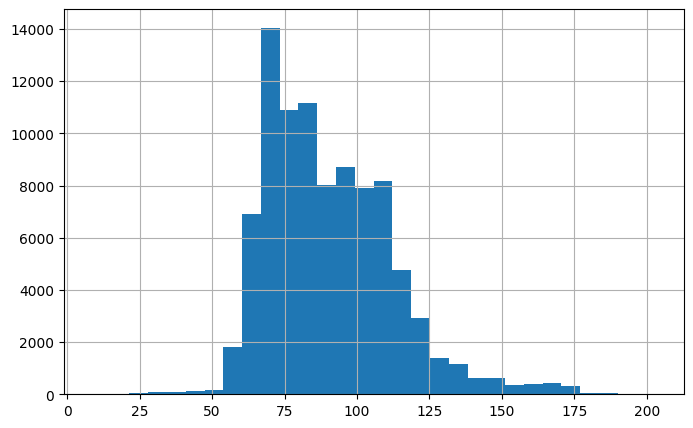

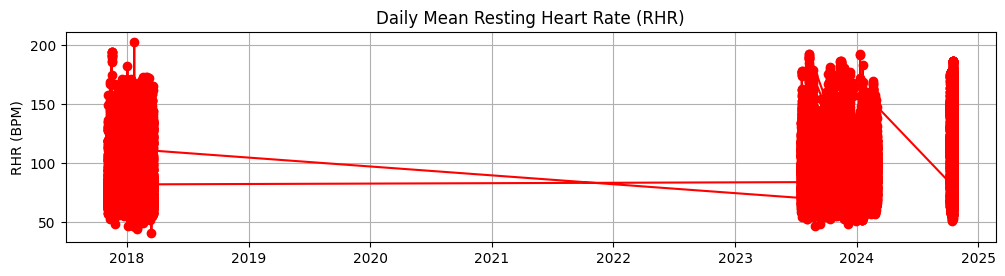

In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
from IPython.display import display  # For better display in notebooks
import matplotlib.pyplot as plt

# Parse the Apple Health XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Extract relevant records
data = []
for record in root.findall('Record'):
    record_type = record.get('type')
    value = record.get('value')
    start_date = record.get('startDate')
    end_date = record.get('endDate')
    source = record.get('sourceName')

    if record_type in [
        "HKQuantityTypeIdentifierHeartRate",
        "HKQuantityTypeIdentifierHeartRateVariabilitySDNN",
        "HKQuantityTypeIdentifierRestingHeartRate",
        "HKWorkoutActivityType",
        "HKCategoryTypeIdentifierSleepAnalysis"
    ]:
        data.append([record_type, value, start_date, end_date, source])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['type', 'value', 'start_date', 'end_date', 'source'])

# Convert date columns to datetime and value to numeric
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# EDA: Basic Statistics and Info

# 1. Dimensions of the DataFrame
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# 2. Column names and data types
print("\nColumns and Data Types:")
print(df.info())

# 3. Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())

# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 5. Unique record types and counts
print("\nUnique Record Types and Their Counts:")
print(df['type'].value_counts())

# 6. Preview of the DataFrame
print("\nSample Data:")
display(df.sample(5))  # Random 5 rows

# 7. Distribution of values (histogram)
df['value'].hist(bins=30, figsize=(8, 5))


# Plotting the trends for mean Resting Heart Rate (RHR) and HRV SDNN over time
plt.figure(figsize=(12, 6))

# Filter for heart rate data
heart_rate_data = df[df['type'] == 'HKQuantityTypeIdentifierHeartRate']

# Resting Heart Rate over time
plt.subplot(2, 1, 1)
# Plot 'value' instead of 'HKQuantityTypeIdentifierHeartRate'
plt.plot(heart_rate_data['start_date'], heart_rate_data['value'], marker='o', color='red', label='Mean RHR')
plt.title('Daily Mean Resting Heart Rate (RHR)')
plt.ylabel('RHR (BPM)')
plt.grid(True)

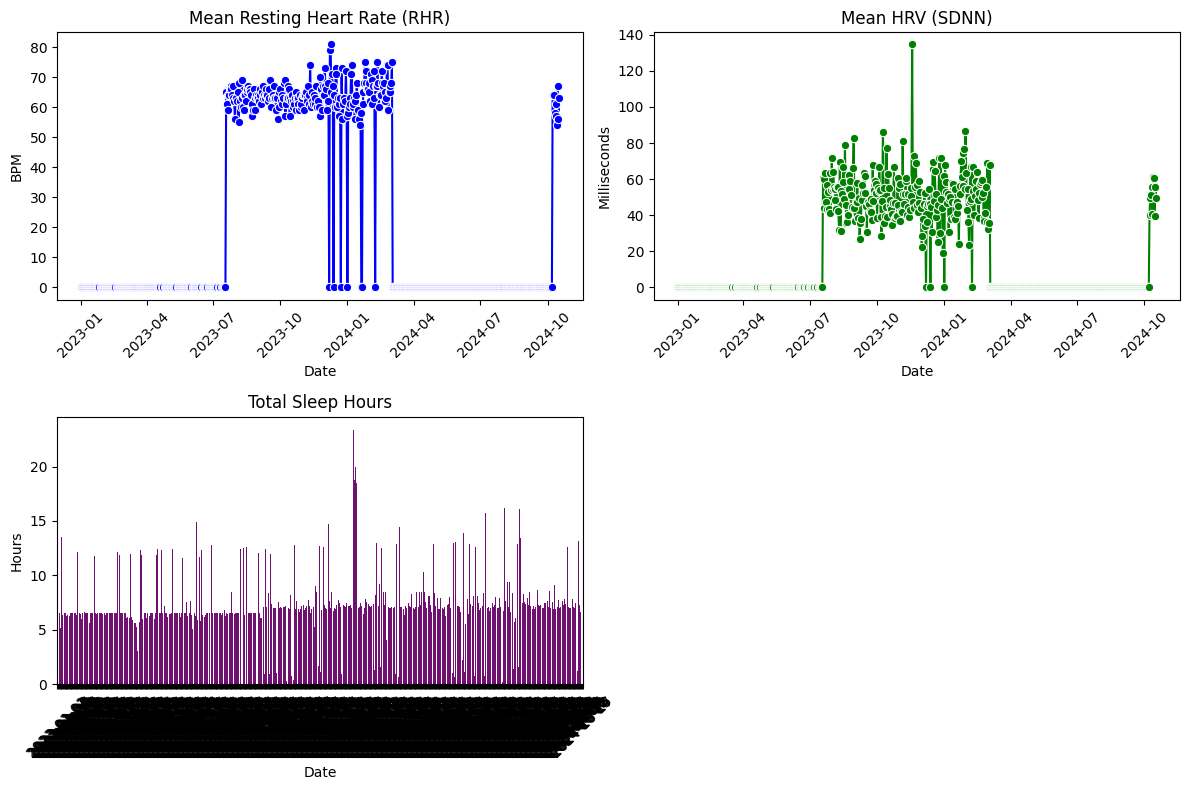

In [4]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parse the Apple Health XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Extract relevant records
data = []
for record in root.findall('Record'):
    record_type = record.get('type')
    value = record.get('value')
    start_date = record.get('startDate')
    end_date = record.get('endDate')

    # Filter for relevant records (RHR, HRV, Sleep, etc.)
    if record_type in [
        "HKQuantityTypeIdentifierHeartRate",
        "HKQuantityTypeIdentifierHeartRateVariabilitySDNN",
        "HKQuantityTypeIdentifierRestingHeartRate",
        "HKCategoryTypeIdentifierSleepAnalysis",
        "HKWorkoutActivityType"
    ]:
        # If it's a sleep record, calculate the duration
        if record_type == "HKCategoryTypeIdentifierSleepAnalysis":
            start_datetime = pd.to_datetime(start_date)
            end_datetime = pd.to_datetime(end_date)
            sleep_duration = (end_datetime - start_datetime).total_seconds() / 3600  # Convert to hours
            data.append([record_type, sleep_duration, start_date])
        else:
            # For other types, append their values directly
            data.append([record_type, value, start_date])

# Create DataFrame
df = pd.DataFrame(data, columns=['type', 'value', 'start_date'])

# Convert date columns and numeric values
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Aggregate daily metrics
daily_metrics = df.pivot_table(
    index='start_date',
    columns='type',
    values='value',
    aggfunc=['mean', 'min', 'max', 'sum']
).reset_index()

# Flatten multi-level column names
daily_metrics.columns = ['_'.join(col).strip() if col[1] else col[0] for col in daily_metrics.columns.values]

# Rename columns for clarity
daily_metrics = daily_metrics.rename(columns={
    'mean_HKQuantityTypeIdentifierRestingHeartRate': 'mean_rhr',
    'min_HKQuantityTypeIdentifierRestingHeartRate': 'min_rhr',
    'max_HKQuantityTypeIdentifierRestingHeartRate': 'max_rhr',
    'mean_HKQuantityTypeIdentifierHeartRateVariabilitySDNN': 'mean_hrv_sdnn',
    'sum_HKCategoryTypeIdentifierSleepAnalysis': 'total_sleep_hours',  # Sum of sleep hours
    'sum_HKWorkoutActivityType': 'total_workout_minutes'
})

# Fill missing values with 0 (or interpolate if appropriate)
daily_metrics = daily_metrics.fillna(0)

# Filter data to only include records from 2023 and 2024
daily_metrics['start_date'] = pd.to_datetime(daily_metrics['start_date'])
filtered_metrics = daily_metrics[
    (daily_metrics['start_date'].dt.year >= 2023) &
    (daily_metrics['start_date'].dt.year <= 2024)
]

# Plot the data
plt.figure(figsize=(12, 8))

# Plot Resting Heart Rate (RHR)
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_rhr', marker='o', color='b')
plt.title('Mean Resting Heart Rate (RHR)')
plt.xlabel('Date')
plt.ylabel('BPM')
plt.xticks(rotation=45)

# Plot Heart Rate Variability (HRV)
plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_hrv_sdnn', marker='o', color='g')
plt.title('Mean HRV (SDNN)')
plt.xlabel('Date')
plt.ylabel('Milliseconds')
plt.xticks(rotation=45)

# Plot Total Sleep Hours
plt.subplot(2, 2, 3)
sns.barplot(data=filtered_metrics, x='start_date', y='total_sleep_hours', color='purple')
plt.title('Total Sleep Hours')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


type  start_date  HKCategoryTypeIdentifierSleepAnalysis  \
0     2017-11-04                                    NaN   
1     2017-11-05                                    NaN   
2     2017-11-06                                    NaN   
3     2017-11-07                                    NaN   
4     2017-11-08                                    NaN   

type  HKQuantityTypeIdentifierHeartRate  \
0                             83.333333   
1                             86.336961   
2                             75.210526   
3                             81.201550   
4                             85.442710   

type  HKQuantityTypeIdentifierHeartRateVariabilitySDNN  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   

type  HKQuantityTypeIdentifierResting

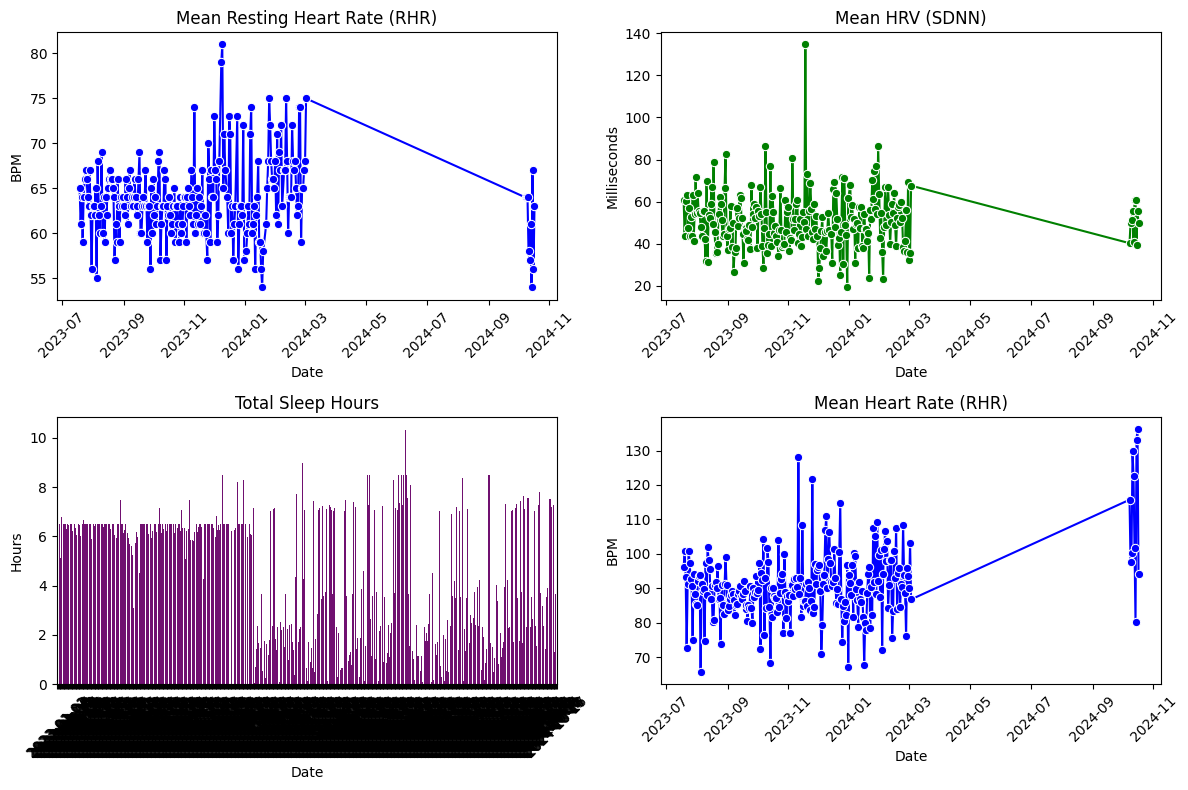

type,start_date,total_sleep_hours,mean_hr,mean_hrv_sdnn,mean_rhr
137,2020-09-23,8.004722,NaN,NaN,NaN
138,2020-09-24,8.006111,NaN,NaN,NaN
139,2020-09-26,7.808056,NaN,NaN,NaN
140,2020-09-27,8.005278,NaN,NaN,NaN
141,2020-09-28,8.005833,NaN,NaN,NaN


In [5]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parse the Apple Health XML file
tree = ET.parse('drive/MyDrive/handsonworkX/export.xml')
root = tree.getroot()

# Extract relevant records
data = []
for record in root.findall('Record'):
    record_type = record.get('type')
    value = record.get('value')
    start_date = record.get('startDate')
    end_date = record.get('endDate')

    # Filter for relevant records (RHR, HRV, Sleep, etc.)
    if record_type in [
        "HKQuantityTypeIdentifierHeartRate",
        "HKQuantityTypeIdentifierHeartRateVariabilitySDNN",
        "HKQuantityTypeIdentifierRestingHeartRate",
        "HKCategoryTypeIdentifierSleepAnalysis",
    ]:
        if record_type == "HKCategoryTypeIdentifierSleepAnalysis":
            start_datetime = pd.to_datetime(start_date)
            end_datetime = pd.to_datetime(end_date)
            sleep_duration = (end_datetime - start_datetime).total_seconds() / 3600  # Convert to hours
            data.append([record_type, sleep_duration, start_date])
        else:
            data.append([record_type, value, start_date])

# Create DataFrame
df = pd.DataFrame(data, columns=['type', 'value', 'start_date'])



# Convert date columns and numeric values
df['start_date'] = pd.to_datetime(df['start_date']).dt.date
df['value'] = pd.to_numeric(df['value'], errors='coerce')


daily_metrics = df.groupby(['start_date', 'type'])['value'].mean().unstack().reset_index()

print(daily_metrics.head())

# Rename columns for clarity
daily_metrics = daily_metrics.rename(columns={
    'HKQuantityTypeIdentifierHeartRate': 'mean_hr',
    'HKQuantityTypeIdentifierRestingHeartRate': 'mean_rhr',
    'HKQuantityTypeIdentifierHeartRateVariabilitySDNN': 'mean_hrv_sdnn',
    'HKCategoryTypeIdentifierSleepAnalysis': 'total_sleep_hours'
})


# Fill missing values with 0, or drop rows with no data
daily_metrics = daily_metrics.dropna(how='all', subset=[
    'mean_rhr', 'mean_hrv_sdnn', 'total_sleep_hours'
])

# Filter 2023 and 2024 data only
daily_metrics['start_date'] = pd.to_datetime(daily_metrics['start_date'])
filtered_metrics = daily_metrics[
    (daily_metrics['start_date'].dt.year >= 2023) &
    (daily_metrics['start_date'].dt.year <= 2024)
]

# Plot the data (only where data exists)
plt.figure(figsize=(12, 8))


# Plot Resting Heart Rate (RHR)

# Plot Resting Heart Rate (RHR)
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_rhr', marker='o', color='b')
plt.title('Mean Resting Heart Rate (RHR)')
plt.xlabel('Date')
plt.ylabel('BPM')
plt.xticks(rotation=45)

# Plot Heart Rate Variability (HRV)
plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_hrv_sdnn', marker='o', color='g')
plt.title('Mean HRV (SDNN)')
plt.xlabel('Date')
plt.ylabel('Milliseconds')
plt.xticks(rotation=45)

# Plot Total Sleep Hours
plt.subplot(2, 2, 3)
sns.barplot(data=filtered_metrics, x='start_date', y='total_sleep_hours', color='purple')
plt.title('Total Sleep Hours')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
sns.lineplot(data=filtered_metrics, x='start_date', y='mean_hr', marker='o', color='b')
plt.title('Mean Heart Rate (RHR)')
plt.xlabel('Date')
plt.ylabel('BPM')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


daily_metrics.head()

In [6]:
columns_to_impute = ['mean_rhr','mean_hr','mean_hrv_sdnn', 'total_sleep_hours']


for col in columns_to_impute:
    non_zero_mean = daily_metrics[daily_metrics[col] != 0][col].mean()
    daily_metrics[col] = daily_metrics[col].replace(0, non_zero_mean)

print(daily_metrics.head())

type start_date  total_sleep_hours  mean_hr  mean_hrv_sdnn  mean_rhr
137  2020-09-23           8.004722      NaN            NaN       NaN
138  2020-09-24           8.006111      NaN            NaN       NaN
139  2020-09-26           7.808056      NaN            NaN       NaN
140  2020-09-27           8.005278      NaN            NaN       NaN
141  2020-09-28           8.005833      NaN            NaN       NaN


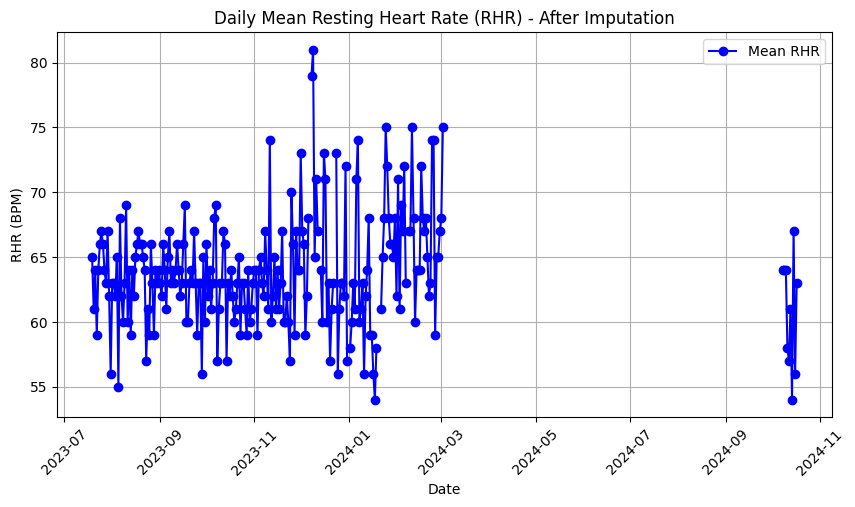

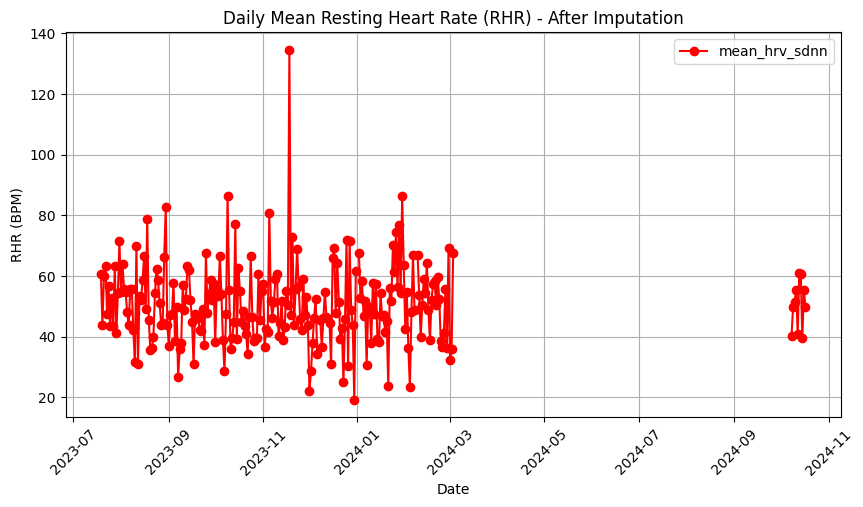

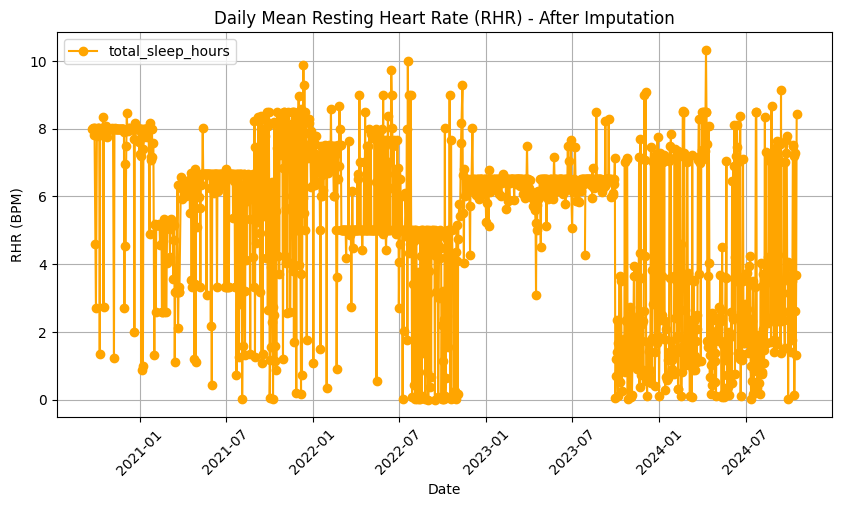

In [7]:
# Plot Resting Heart Rate (RHR) after imputation
plt.figure(figsize=(10, 5))
plt.plot(daily_metrics['start_date'], daily_metrics['mean_rhr'], marker='o', color='blue', label='Mean RHR')
plt.title('Daily Mean Resting Heart Rate (RHR) - After Imputation')
plt.xlabel('Date')
plt.ylabel('RHR (BPM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Plot Resting Heart Rate (RHR) after imputation
plt.figure(figsize=(10, 5))
plt.plot(daily_metrics['start_date'], daily_metrics['mean_hrv_sdnn'], marker='o', color='red', label='mean_hrv_sdnn')
plt.title('Daily Mean Resting Heart Rate (RHR) - After Imputation')
plt.xlabel('Date')
plt.ylabel('RHR (BPM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot Resting Heart Rate (RHR) after imputation
plt.figure(figsize=(10, 5))
plt.plot(daily_metrics['start_date'], daily_metrics['total_sleep_hours'], marker='o', color='orange', label='total_sleep_hours')
plt.title('Daily Mean Resting Heart Rate (RHR) - After Imputation')
plt.xlabel('Date')
plt.ylabel('RHR (BPM)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()



Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 137 to 1567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   start_date         1431 non-null   datetime64[ns]
 1   total_sleep_hours  1422 non-null   float64       
 2   mean_hr            239 non-null    float64       
 3   mean_hrv_sdnn      235 non-null    float64       
 4   mean_rhr           231 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 67.1 KB
None

Summary Statistics:
type                      start_date  total_sleep_hours     mean_hr  \
count                           1431        1422.000000  239.000000   
mean   2022-10-08 19:28:18.113207552           5.161023   90.953155   
min              2020-09-23 00:00:00           0.004861   65.686270   
25%              2021-10-02 12:00:00           3.442014   85.236023   
50%              2022-09-26 00:00:00           6

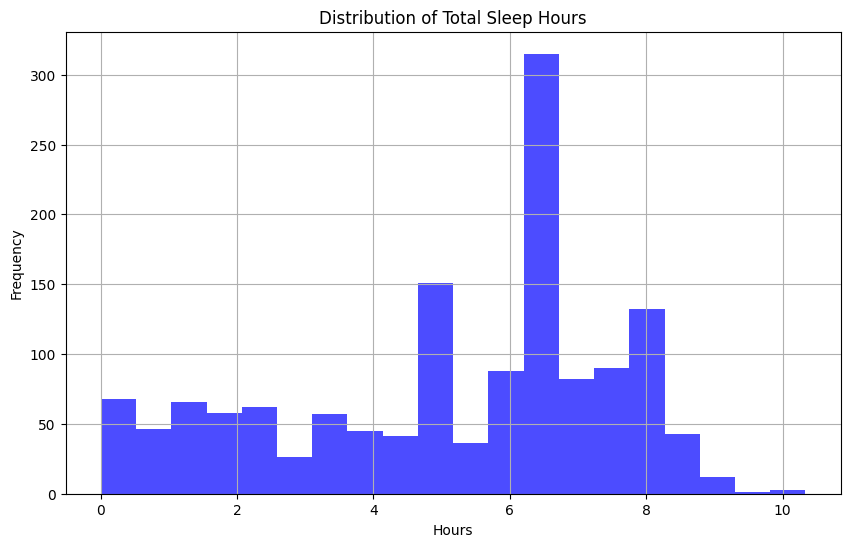

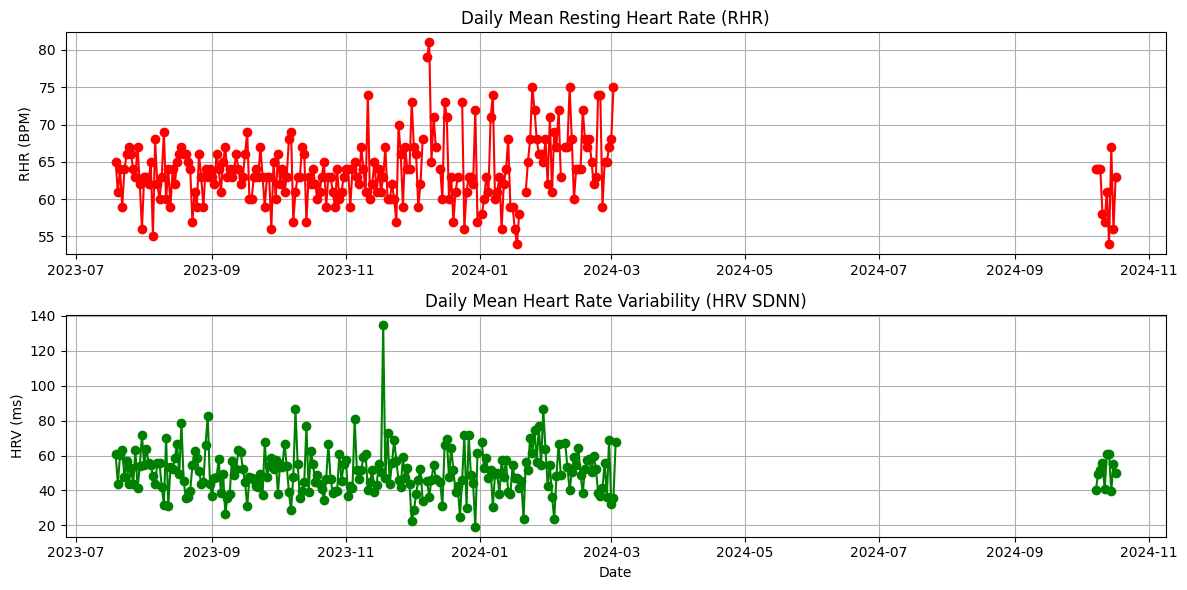


Correlation Matrix:
type               start_date  total_sleep_hours   mean_hr  mean_hrv_sdnn  \
type                                                                        
start_date           1.000000          -0.387552  0.379123      -0.014343   
total_sleep_hours   -0.387552           1.000000  0.007892       0.003302   
mean_hr              0.379123           0.007892  1.000000      -0.180708   
mean_hrv_sdnn       -0.014343           0.003302 -0.180708       1.000000   
mean_rhr             0.042904          -0.061727  0.428247      -0.211546   

type               mean_rhr  
type                         
start_date         0.042904  
total_sleep_hours -0.061727  
mean_hr            0.428247  
mean_hrv_sdnn     -0.211546  
mean_rhr           1.000000  
Number of rows: 1431
Number of columns: 5


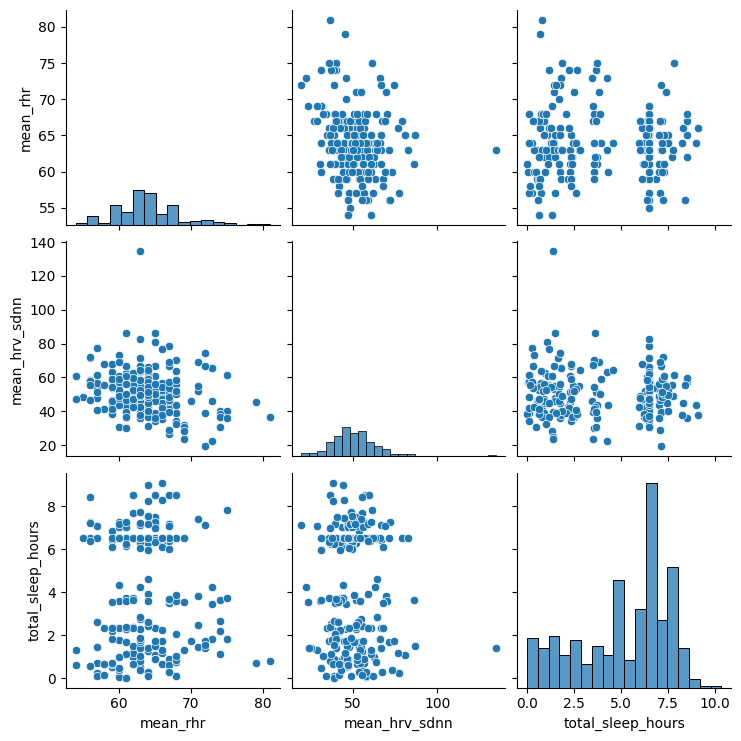

In [8]:
import matplotlib.pyplot as plt

# Display the basic info and summary statistics
print("Dataframe Information:")
print(daily_metrics.info())

print("\nSummary Statistics:")
print(daily_metrics.describe())

# Preview the dataset
print("\nSample Daily Metrics Data:")
print(daily_metrics.sample(5))

# Distribution of total sleep hours
plt.figure(figsize=(10, 6))
plt.hist(daily_metrics['total_sleep_hours'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Total Sleep Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the trends for mean Resting Heart Rate (RHR) and HRV SDNN over time
plt.figure(figsize=(12, 6))

# Resting Heart Rate over time
plt.subplot(2, 1, 1)
plt.plot(daily_metrics['start_date'], daily_metrics['mean_rhr'], marker='o', color='red', label='Mean RHR')
plt.title('Daily Mean Resting Heart Rate (RHR)')
plt.ylabel('RHR (BPM)')
plt.grid(True)

# HRV SDNN over time
plt.subplot(2, 1, 2)
plt.plot(daily_metrics['start_date'], daily_metrics['mean_hrv_sdnn'], marker='o', color='green', label='Mean HRV SDNN')
plt.title('Daily Mean Heart Rate Variability (HRV SDNN)')
plt.xlabel('Date')
plt.ylabel('HRV (ms)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Correlation analysis
print("\nCorrelation Matrix:")
print(daily_metrics.corr())


# 1. Dimensions of the DataFrame
print(f"Number of rows: {daily_metrics.shape[0]}")
print(f"Number of columns: {daily_metrics.shape[1]}")

# Pairplot for visualizing relationships (optional, but useful for in-depth analysis)
import seaborn as sns
sns.pairplot(daily_metrics[['mean_rhr', 'mean_hrv_sdnn', 'total_sleep_hours']])
plt.show()

In [9]:
columns_to_normalize = ['mean_hr', 'mean_rhr', 'mean_hrv_sdnn', 'total_sleep_hours']  # Example columns

# Check if values are within the [0, 1] range
print(daily_metrics[columns_to_normalize].describe())

type      mean_hr    mean_rhr  mean_hrv_sdnn  total_sleep_hours
count  239.000000  231.000000     235.000000        1422.000000
mean    90.953155   63.839827      50.601468           5.161023
std     10.366384    4.407047      13.215921           2.431394
min     65.686270   54.000000      19.274200           0.004861
25%     85.236023   61.000000      42.080775           3.442014
50%     90.097721   63.000000      49.269150           6.040764
75%     95.490628   66.000000      57.485571           6.823194
max    136.260051   81.000000     134.632950          10.334167


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply normalization to relevant columns
columns_to_normalize = ['mean_hr',
                        'mean_hrv_sdnn',
                        'mean_rhr',
                        'total_sleep_hours']

# Fit and transform the scaler on these columns
daily_metrics[columns_to_normalize] = scaler.fit_transform(daily_metrics[columns_to_normalize])

print(daily_metrics.head())  # View normalized values


type start_date  total_sleep_hours  mean_hr  mean_hrv_sdnn  mean_rhr  stress  \
137  2020-09-23           0.774482      NaN            NaN       NaN       0   
138  2020-09-24           0.774616      NaN            NaN       NaN       0   
139  2020-09-26           0.755442      NaN            NaN       NaN       0   
140  2020-09-27           0.774536      NaN            NaN       NaN       0   
141  2020-09-28           0.774590      NaN            NaN       NaN       0   

type  stress_level  
137              0  
138              0  
139              0  
140              0  
141              0  


verificar a junção dos dois datasets ou se os dois estão sendo utilizados para treinamento do modelo.

In [28]:
# Step 2: Augment data with synthetic stress samples
stress_samples = daily_metrics.sample(1400, random_state=42).copy()

# Simulate stress conditions on all relevant columns, including 'mean_rhr'
stress_samples['mean_hr'] *= np.random.uniform(1.2, 1.5, size=1400)
stress_samples['mean_hrv_sdnn'] *= np.random.uniform(0.4, 0.6, size=1400)
stress_samples['total_sleep_hours'] *= np.random.uniform(0.4, 0.7, size=1400)
stress_samples['mean_rhr'] *= np.random.uniform(1.1, 1.3, size=1400)  # Simulate stress effect on mean_rhr

# Clip values to stay within the normalized range [0, 1]
stress_samples[columns_to_normalize] = stress_samples[columns_to_normalize].clip(0, 1)

# Assign stress labels
stress_samples['stress'] = 1
daily_metrics['stress'] = 0


Stress Label Distribution:
stress
0    1431
1    1400
Name: count, dtype: int64

Summary Statistics:
type                      start_date  total_sleep_hours     mean_hr  \
count                           2831        2813.000000  472.000000   
mean   2022-10-08 05:30:06.993995264           3.063966   46.548314   
min              2020-09-23 00:00:00           0.003229    1.000000   
25%              2021-10-02 12:00:00           1.000000    1.000000   
50%              2022-09-24 00:00:00           1.000000   67.912777   
75%              2023-10-23 00:00:00           6.093889   90.113101   
max              2024-10-17 00:00:00          10.334167  136.260051   
std                              NaN           2.740333   45.619746   

type   mean_hrv_sdnn    mean_rhr       stress  
count     464.000000  456.000000  2831.000000  
mean       26.121433   32.833333     0.494525  
min         1.000000    1.000000     0.000000  
25%         1.000000    1.000000     0.000000  
50%        23.6290

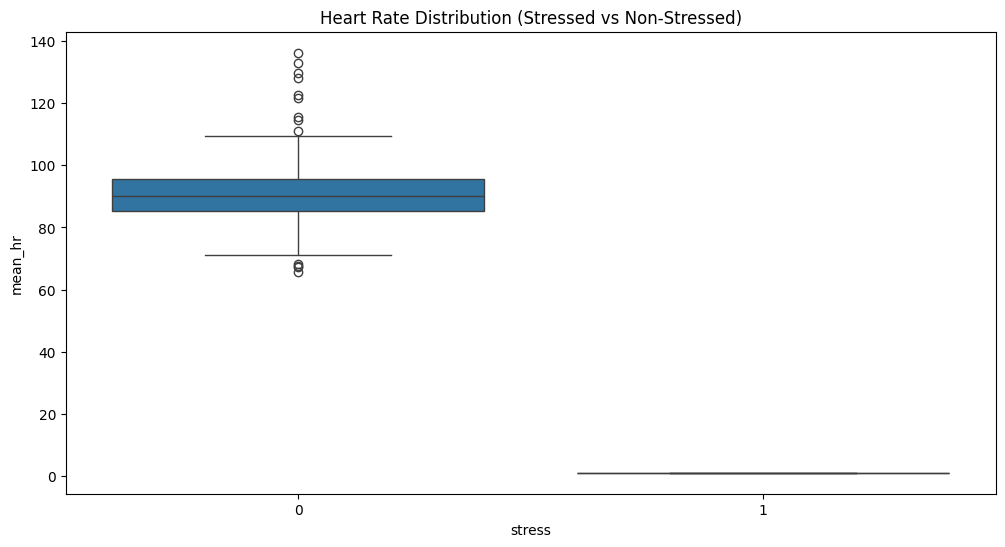

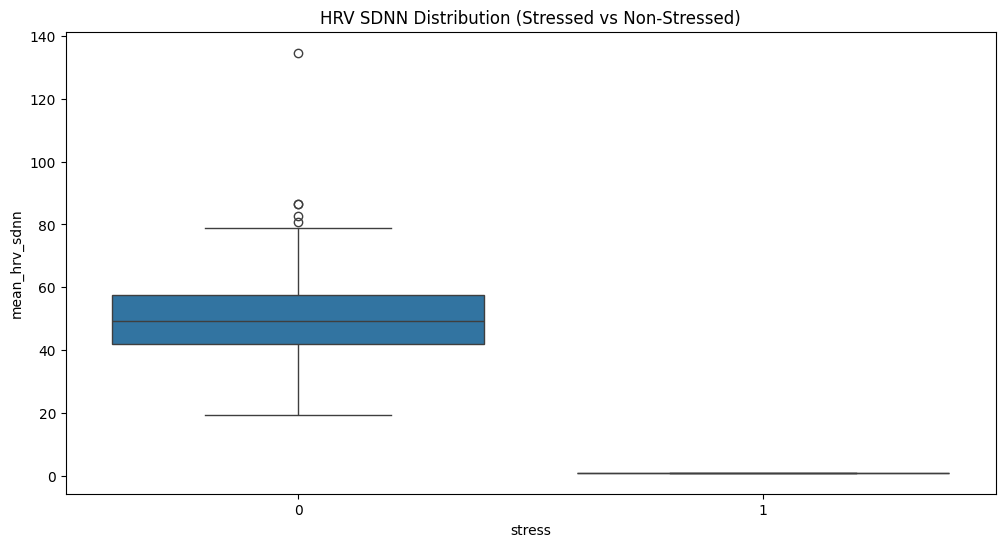

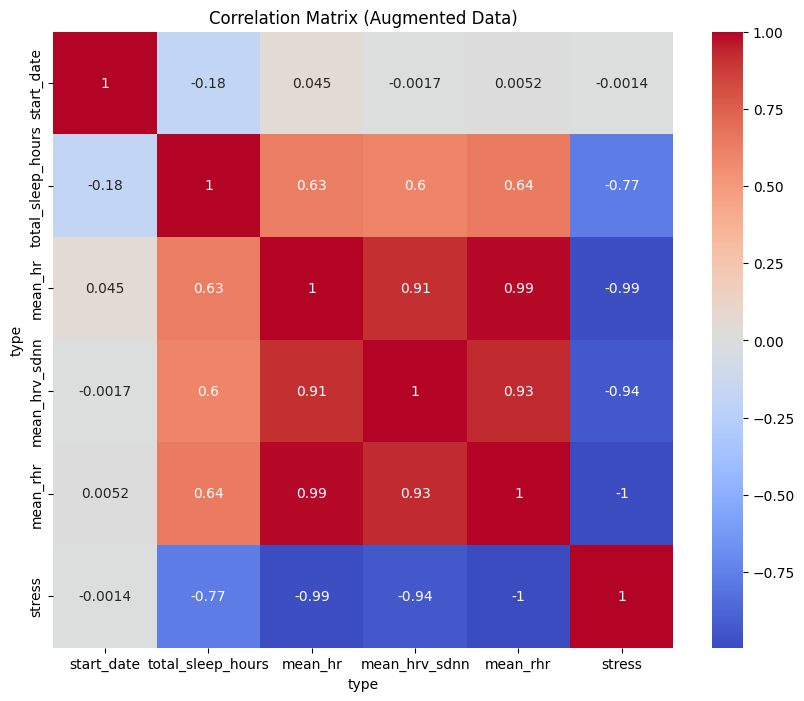

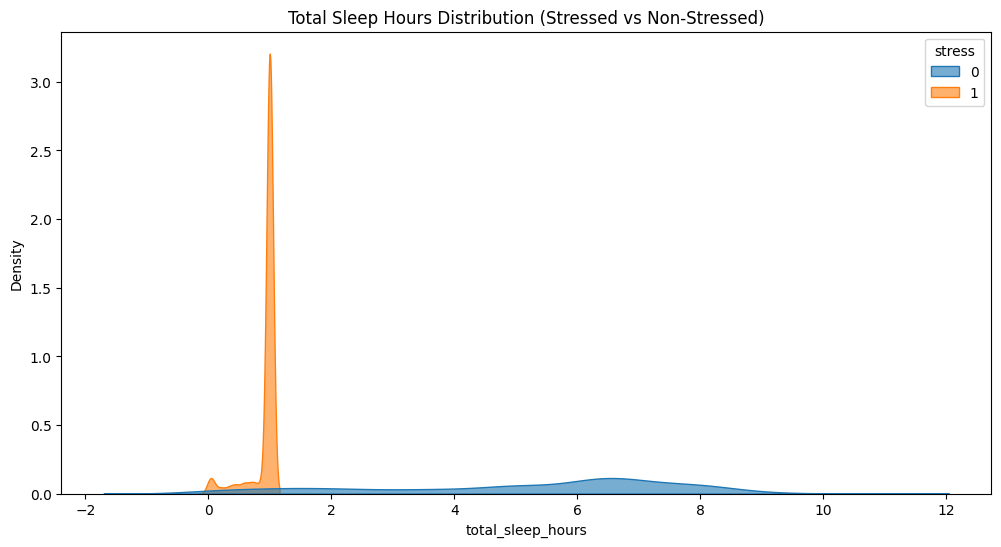

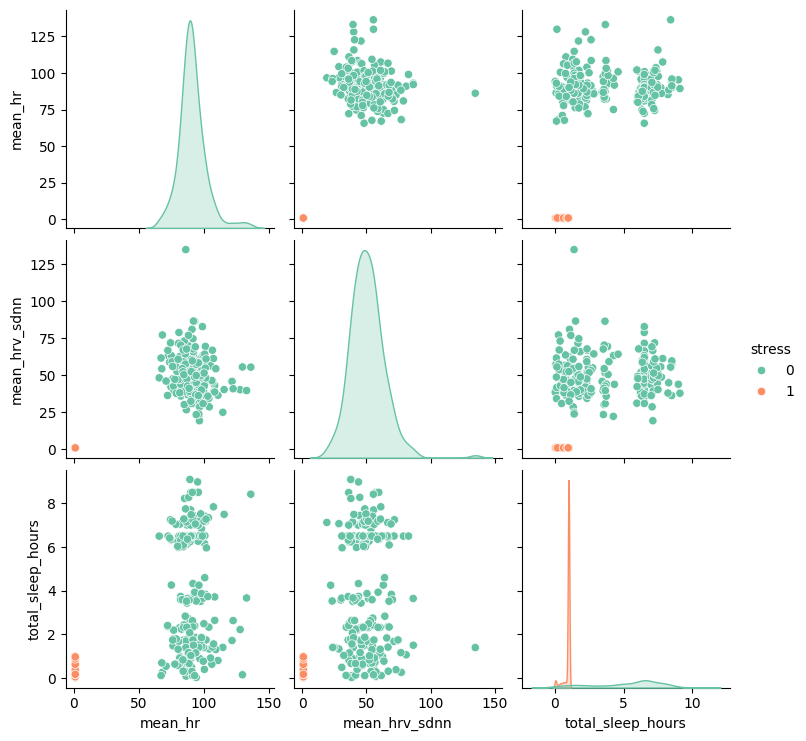

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of stress and non-stress data
print("\nStress Label Distribution:")
print(augmented_data['stress'].value_counts())

# Summary statistics for augmented data
print("\nSummary Statistics:")
print(augmented_data.describe())

# Check for any missing values
print("\nMissing Values:")
print(augmented_data.isnull().sum())

# Visualize the distribution of key metrics for stressed vs non-stressed
plt.figure(figsize=(12, 6))
sns.boxplot(x='stress', y='mean_hr', data=augmented_data)
plt.title('Heart Rate Distribution (Stressed vs Non-Stressed)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='stress', y='mean_hrv_sdnn', data=augmented_data)
plt.title('HRV SDNN Distribution (Stressed vs Non-Stressed)')
plt.show()

# Correlation matrix for augmented data
corr = augmented_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Augmented Data)')
plt.show()

# Plot total sleep hours for stressed vs non-stressed data
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=augmented_data, x='total_sleep_hours', hue='stress', fill=True, alpha=0.6
)
plt.title('Total Sleep Hours Distribution (Stressed vs Non-Stressed)')
plt.show()

# Pairplot to visualize relationships between key metrics
sns.pairplot(
    augmented_data[['mean_hr', 'mean_hrv_sdnn', 'total_sleep_hours', 'stress']],
    hue='stress', palette='Set2'
)
plt.show()

In [30]:
augmented_data = pd.concat([daily_metrics, stress_samples], ignore_index=True)

In [31]:
def stress_level(row):
    # These thresholds assume normalized values (between 0 and 1)
    if row['mean_hr'] > 0.8 and row['mean_hrv_sdnn'] < 0.3 and row['total_sleep_hours'] < 0.3 and row['mean_rhr'] > 0.7:
        return 2  # High stress
    elif row['mean_hr'] > 0.5 and row['mean_hrv_sdnn'] < 0.5 and row['total_sleep_hours'] < 0.5 and row['mean_rhr'] > 0.5:
        return 1  # Medium stress
    else:
        return 0  # Low stress


augmented_data['stress_level'] = augmented_data.apply(stress_level, axis=1)

print("Augmented Data with Stress Levels:")
print(augmented_data[['mean_hr', 'mean_hrv_sdnn', 'mean_rhr', 'total_sleep_hours', 'stress_level']].head())

Augmented Data with Stress Levels:
type  mean_hr  mean_hrv_sdnn  mean_rhr  total_sleep_hours  stress_level
0         NaN            NaN       NaN           0.774482             0
1         NaN            NaN       NaN           0.774616             0
2         NaN            NaN       NaN           0.755442             0
3         NaN            NaN       NaN           0.774536             0
4         NaN            NaN       NaN           0.774590             0


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib  # for saving the model

# Step 1: Prepare the data
# Define features and labels
features = ['mean_hr', 'mean_hrv_sdnn', 'mean_rhr', 'total_sleep_hours']
X = augmented_data[features]
y = augmented_data['stress_level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Step 3: Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 4: Save the model for future use
joblib.dump(model, 'stress_level_model.joblib')
print("Model saved as 'stress_level_model.joblib'")

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       551
      Medium       0.94      1.00      0.97        15
        High       1.00      1.00      1.00         1

    accuracy                           1.00       567
   macro avg       0.98      1.00      0.99       567
weighted avg       1.00      1.00      1.00       567

Accuracy: 0.9982363315696648
Model saved as 'stress_level_model.joblib'


In [34]:
# Load the model
loaded_model = joblib.load('stress_level_model.joblib')

# Example new data (normalized) for inference
new_data = pd.DataFrame({
    'mean_hr': [0.7],
    'mean_hrv_sdnn': [0.2],
    'mean_rhr': [0.6],
    'total_sleep_hours': [0.3]
})

# Make a prediction
predicted_stress_level = loaded_model.predict(new_data)
print("Predicted Stress Level:", predicted_stress_level[0])  # 0 = Low, 1 = Medium, 2 = High

Predicted Stress Level: 1


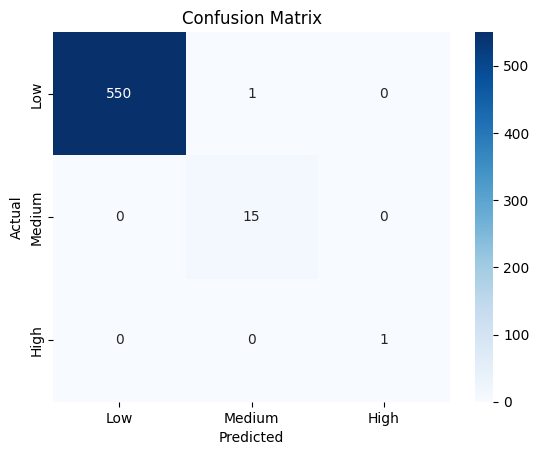

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

# One-hot encode the labels for multi-class ROC-AUC score calculation
y_test_encoded = pd.get_dummies(y_test, columns=['stress_level'])
y_pred_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class="ovo")

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9993705632563835


In [37]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99294533 0.99823322 0.99469965 0.99646643 0.99646643]
Mean CV Score: 0.995762210132057
